In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
ethn_df = pd.read_csv("../Images/GenderEthnicityResources/binned_id_gender_ethnicity.csv")
ethn_df.head()

Unnamed: 0           id  gender  ethnicity
0           0   3211298559       1  caucasian
1           1  82733984485       1  caucasian
2           2  99029428429       0  caucasian
3           3  71174220620       1  caucasian
4           4  47408331317       1  caucasian

In [4]:
ethn_df['id'] = ethn_df['id'].apply(pd.to_numeric)
ethn_df.dtypes

Unnamed: 0     int64
id             int64
gender         int64
ethnicity     object
dtype: object

In [5]:
source = '../Images/GenderEthnicityResources/photos/'
numPics = pd.DataFrame([int(f[:-5]) for f in os.listdir(source) if f.endswith('.jpg')], columns=["id"])
print(numPics.dtypes)


print(ethn_df['id'].isin(numPics['id']).value_counts())
joined = pd.merge(numPics, ethn_df, how='inner', on="id")

id    int64
dtype: object
False    30856631
True      1426142
Name: id, dtype: int64


In [64]:
samples = {}
for ethnicity in joined['ethnicity'].unique():
    temp = joined[joined['ethnicity']==ethnicity]
    print(ethnicity, temp.shape)
    samples[ethnicity] = list(temp.sample(200)['id'])

hispanic (326346, 4)
eastasian (61716, 4)
caucasian (920223, 4)
southasian (109197, 4)
african (8660, 4)


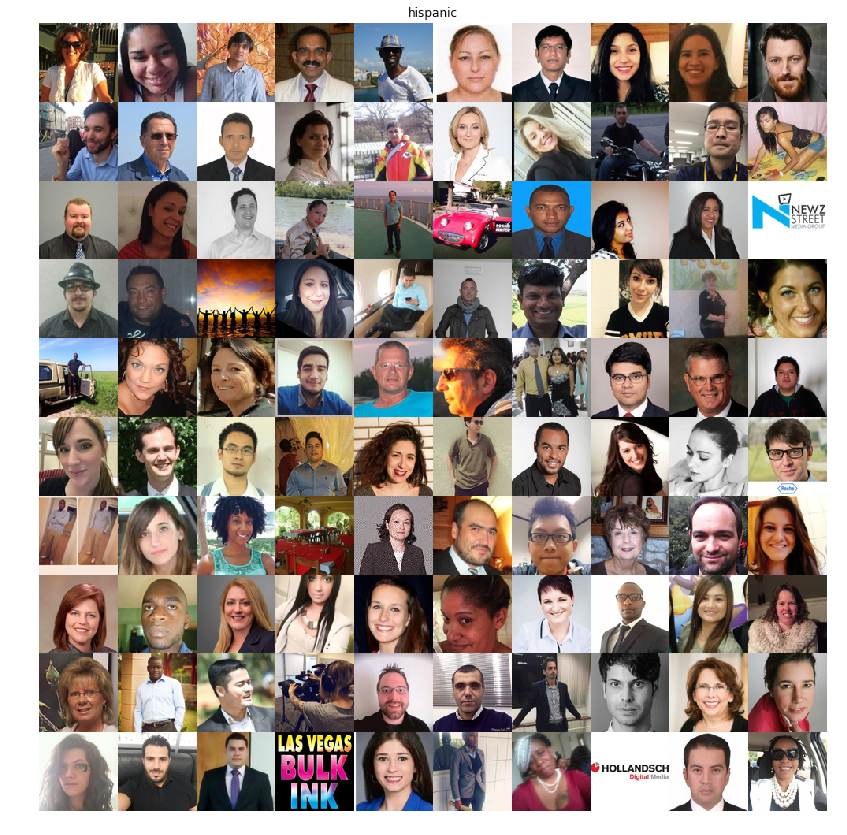

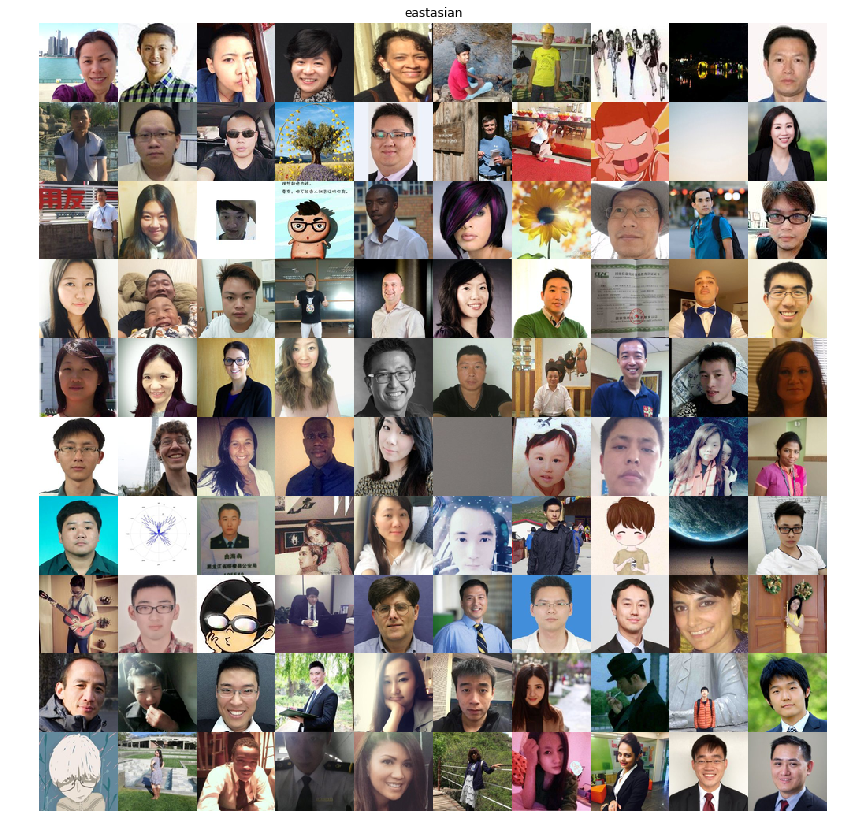

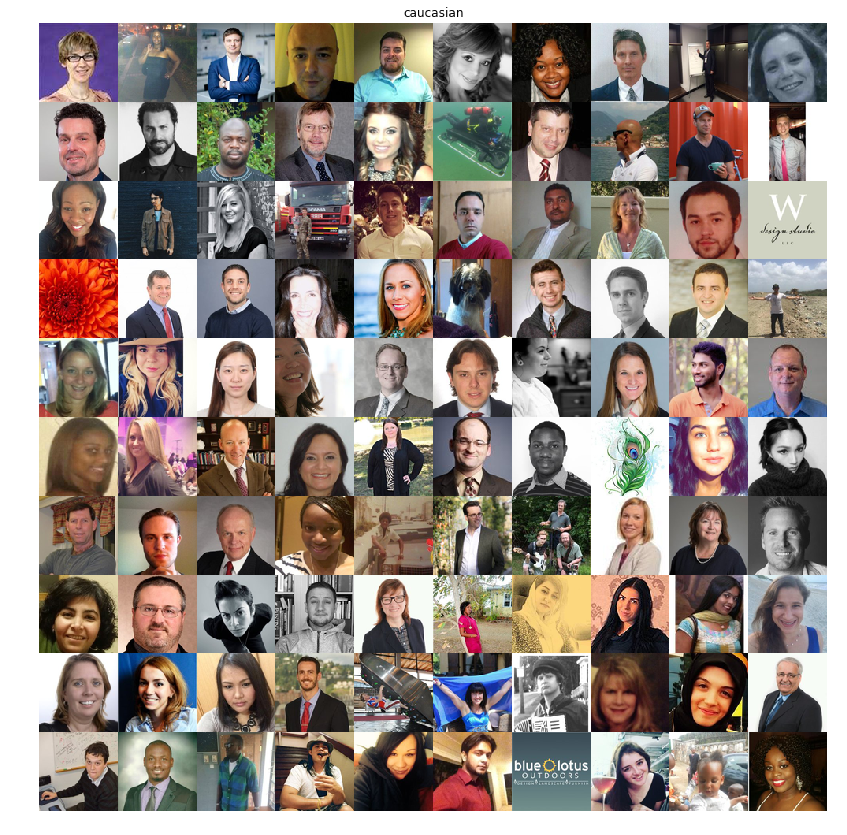

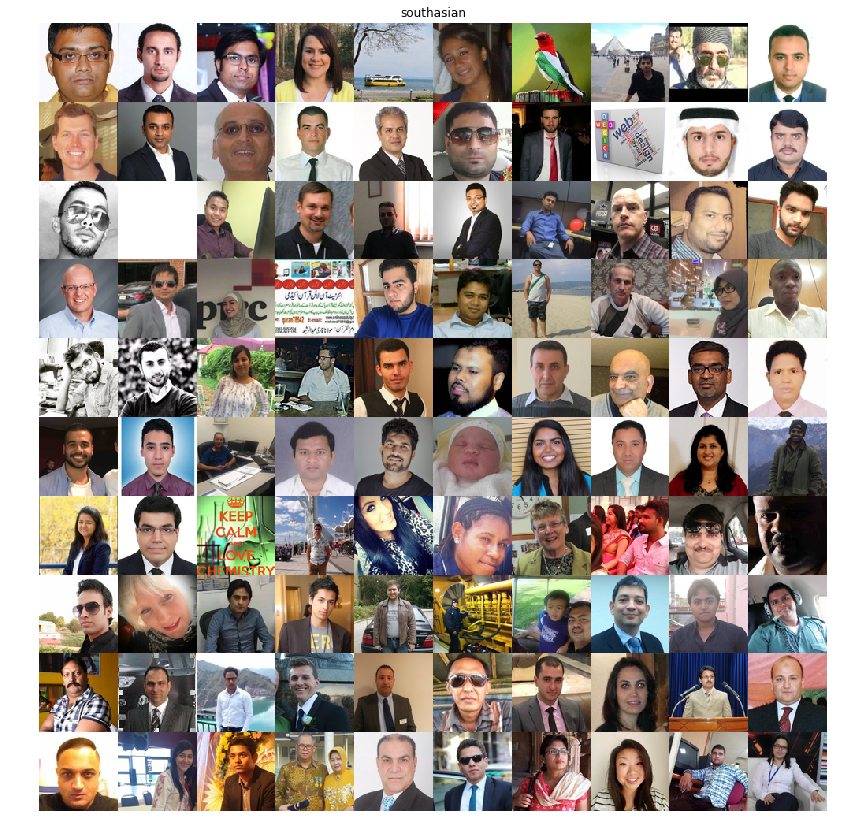

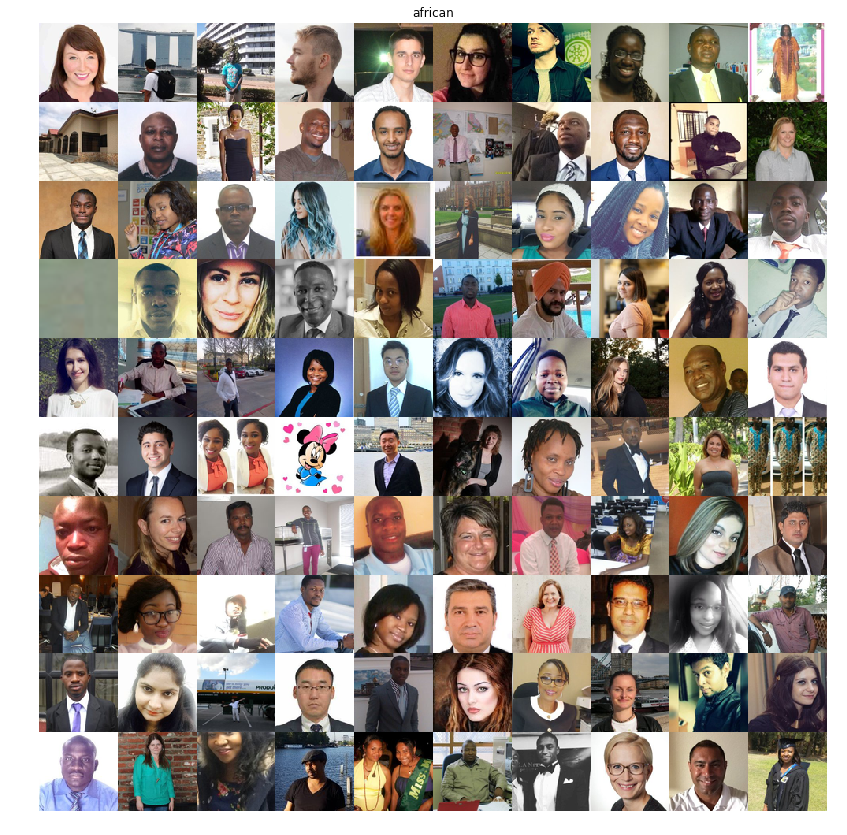

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
from time import sleep

def calc_tile(files):
    new_im = Image.new('RGB', (1000,1000), (100,100,100))
    index = 0
    for i in range(0,1000,100):
        j = 0
        while (j < 1000):
            try:
                image = Image.open(files[index])                
            except Exception as e:
                index += 1
                continue
            width  = image.size[0]
            height = image.size[1]

            aspect = width / float(height)

            ideal_width = 100
            ideal_height = 100

            ideal_aspect = ideal_width / float(ideal_height)

            if aspect > ideal_aspect:
                # Then crop the left and right edges:
                new_width = int(ideal_aspect * height)
                offset = (width - new_width) / 2
                resize = (offset, 0, width - offset, height)
            else:
                # ... crop the top and bottom:
                new_height = int(width / ideal_aspect)
                offset = (height - new_height) / 2
                resize = (0, offset, width, height - offset)

            thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
            new_im.paste(thumb, (i,j))
            index += 1
            j += 100
    return new_im

images = []
cols = 2
titles = list(samples)
for i in titles:
    vis = []
    for pic in samples[i]:
        vis.append("../Images/GenderEthnicityResources/photos/"+str(pic)+"..jpg")
    images.append(calc_tile(vis))    

for n, (image, title) in enumerate(zip(images, titles)):
    fig = plt.figure()
    a = fig.add_subplot(cols, np.ceil(n_images), 1)
    plt.imshow(image)
    a.set_title(title)
    plt.axis('off')
    fig.set_size_inches(np.array(fig.get_size_inches()) * 8)
    plt.show()
    sleep(2)


In [36]:
ethn_df['ethnicity'].unique()


array(['french', 'czech', 'swedish', 'danish', 'indian', 'jewish',
       'russian', 'spanish', 'irish', 'swiss', 'muslim', 'italian',
       'german', 'chinese', 'japanese', 'portugese', 'slavic', 'greek',
       'korean', 'african', 'ukranian', 'arabic', 'vietnamese'], dtype=object)

In [45]:
dict = {
    'french':'caucasian', 
    'czech':'caucasian', 
    'swedish':'caucasian', 
    'danish':'caucasian', 
    'indian':'southasian', 
    'jewish':'caucasian',
    'russian':'caucasian', 
    'spanish':'hispanic', 
    'irish':'caucasian', 
    'swiss':'caucasian', 
    'muslim':'southasian', 
    'italian':'caucasian',
    'german':'caucasian', 
    'chinese':'eastasian', 
    'japanese':'eastasian', 
    'portugese':'caucasian', 
    'slavic':'caucasian', 
    'greek':'caucasian',
    'korean':'eastasian', 
    'african':'african', 
    'ukranian':'caucasian', 
    'arabic':'southasian', 
    'vietnamese':'eastasian'
}
for i in list(dict):
    ethn_df.replace(i, dict[i], inplace= True)

In [47]:
ethn_df['ethnicity'].value_counts()

caucasian     20825462
hispanic       7392333
southasian     2476257
eastasian      1386231
african         202490
Name: ethnicity, dtype: int64

In [48]:
ethn_df.to_csv("../Images/GenderEthnicityResources/binned_id_gender_ethnicity.csv")